<a href="https://colab.research.google.com/github/yeahzee0421/AI/blob/main/g_26_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 로드

In [4]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

## MNIST 이미지 확인 및 데이터 전처리

<function matplotlib.pyplot.show(*args, **kw)>

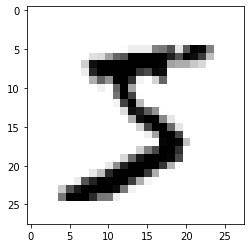

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary) ##2차원배열을 그림으로 그려라. 
plt.show

In [ ]:
train_images.shape ##6만장의 사진

(60000, 28, 28)

In [9]:
train_labels[:5] #이미지 5개의 정답을 나타냄. 

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
train_images_flat = train_images.reshape(60000, 28*28) #3차원을 2차원으로 바꾼다. 
train_images_flat = train_images_flat.astype('float32')/255

test_images_flat = test_images.reshape(10000, 28*28)
test_images_flat = test_images_flat.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## MLP 로 구현(케라스 사용)

In [14]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [17]:
model.fit(train_images_flat, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 6s 3ms/step - loss: 0.2749 - accuracy: 0.9203
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1183 - accuracy: 0.9642
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0850 - accuracy: 0.9742
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0672 - accuracy: 0.9797
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0557 - accuracy: 0.9838


In [21]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9738
test_acc =  0.973800003528595


## CNN 모델 생성

In [25]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

## 훈련

In [26]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [27]:
train_images_cnn = train_images.reshape(-1,28,28,1)

In [28]:
train_images_cnn.shape

(60000, 28, 28, 1)

In [29]:
model.fit(train_images_cnn, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 15s 5ms/step - loss: 0.3583 - accuracy: 0.9432
Epoch 2/3
938/938 [==============================] - 4s 5ms/step - loss: 0.0556 - accuracy: 0.9834
Epoch 3/3
938/938 [==============================] - 4s 4ms/step - loss: 0.0398 - accuracy: 0.9891


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9738
test_acc =  0.973800003528595
